# Pryngles Tutorials: Developers
## Part 1 - Presentation and general modules

This notebook illustrate in detail the interface of the `Pryngles` package. It is especially intended for developers.

Authors:
- Jorge I. Zuluaga, [jorge.zuluaga@udea.edu.co](mailto:jorge.zuluaga@udea.edu.co)

Warnings:
- This file was prepared using version 0.7.3.1 of `Pryngles`.
- Matplotlib commands run in version 3.5.2.

<center><font color='red' size='8'><i>This tutorial is under construction.</i></font></center>

## Preparation

Before running this tutorial you need to install `Pryngles`:

In [1]:
#!python -m pip install -qU pryngles
#!pip show pryngles

If you are running this tutrial in `Google Colab` please run the following lines:

In [2]:
"""
import matplotlib.pyplot as plt
RESOLUTION = 150
%matplotlib inline
plt.rcParams['figure.dpi'] = RESOLUTION
# Sometimes you need to run twice this magic to be sure the backend is loaded
%matplotlib inline
#""";

## Import useful packages

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Although it is not a good practice to import everything of a package, for this tutorial and to avoid excesively large names we will import everything from Pryngles:

In [2]:
from pryngles import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Structure of the package

`Pryngles` is a highly modular package divided in modules and datafiles.  At designing the package we have followed the rule or convention of creating for each module a `Class` with the name of the module. Thus for instance, the module `plot` contains a general purpose class `Plot` containing routines intended for plotting purposes, eg. `Plot.pryngles_mark()`.

`Pryngles` has two type of modules: 

- **General modules**: These modules contain *static classes*, i.e. classes that cannot be instantiated and their methods work as regular functions.  Example:

  ```python
     
     #Definition
     class Foo(object):
        def test(x):
            return not x

     #Usage
     Foo(True)
  ```
  
- **Core modules**: These are the key modules in the package.  They contain regular classes and perform the most specialized functions in the package.

Pryngles has the following **general modules**:

- `consts`: Constants and other methods associated to them.
- `util`: Util and miscellaneous routines.
- `plot`: Plotting methods and other miscelaneous routines.
- `science`: Classes and methods involving useful scientific calculations.

The most important modules, the **core modules**, implementing the core functionalities in the package are:

- `sampler`: Module containing the classes and methods to generate sample of points.
- `spangler`: Classes and methods to spangle bodies.
- `body`: Classes and methods used to create and spangle astrophysical bodies.
- `system`: This is the most important module.  It contains the classes and methods use to define a planetary system, spangle it and calculate light-curves.
- `legacy`: This module contains all the classes and routines of the legacy `RingedPlanet` interface to Pryngles.  This interface will be deprecated in version 2.0.

In this tutorial we will offer a detailed guide to each module.

## About Pryngles Interfaces

`Pryngles` is a research package, designed and released at the pace of research. For the same reason, it has evolved in a different way to professional software.

Due to historical (the history of development) reasons `Pryngles` has two interfaces.  Interfaces differ in many aspects, some of them are superficial others are more deep and are related to the design of the package, even with the physics involved.  The interfaces are:

- **System Interface**. This is the newest interface. In this interface we use the `snake_case` naming convention for methods. The interface is loaded using:

  ```python
  import pryngles as pr
  sys=pr.System()
  ```

- **RingedPlaned Interface**. This was the first interface developed in Pryngles.  For the same reason is the most tested Interface and the one that has been currently used to produce research results.  This interface is loaded when the package is imported as:

  ```python
  import pryngles as pr
  RP=pr.RingedPlanet()
  ```

These interfaces are in the present version of the package somewhat compatible.  The following commands show how to define a RingedPlanet starting with the System interface:

```python
sys=pr.System()
S=sys.add(kind="Star",
          physics=dict(radius=Consts.rsun/sys.ul),
          optics=dict(limb_coeffs=[0.65])
         )
P=sys.add(kind="Planet",primary=S,
          orbit=dict(a=0.2,e=0.0),
          physics=dict(radius=Consts.rsaturn/sys.ul)
         )
R=sys.add(kind="Ring",primary=P,
          physics=dict(fi=1.5,fe=2.5,i=30*Consts.deg)
         )
O=sys.add(kind="Observer",
          optics=dict(lamb=90*Consts.deg,beta=90*Consts.deg)
         )
RP=sys.ensamble_system()
```
  
Although a complete guide to the RingedPlanet interface is at the end of this tutorial, we focus here on the System interface.

## General modules

### Constants (`consts`)

The `Consts` class contains all the constants defined in `Pryngles`.  There are two types of constants in Pryngles: `physical` and `numerical`.  The `physical` constants are values of physical and astronomical constants.  They are all under the static class `Consts`:

In [3]:
Consts.rsun

695700000.0

All physical constants are in SI units.  To get all physical constants use:

In [4]:
print(Consts.get_physical())

['au', 'aus', 'cm', 'd', 'day', 'days', 'deg', 'g', 'gram', 'gyr', 'hr', 'jyr', 'kg', 'km', 'kyr', 'm', 'mearth', 'mjupiter', 'mmars', 'mmercury', 'mneptune', 'mpluto', 'msaturn', 'msolar', 'msun', 'muranus', 'mvenus', 'myr', 'parsec', 'pc', 'ppb', 'ppm', 'rad', 'rearth', 'rjupiter', 'rsaturn', 'rsun', 's', 'solarmass', 'sunmass', 'yr', 'yrs']


Most `physical` constants in `Pryngles` comes from `Rebound` package.

`numerical` constants are quantities used across the package:

In [5]:
print(Consts.get_all())

['BODY_DEFAULTS', 'BODY_KINDS', 'DEG', 'FILE', 'GSI', 'HTML', 'IN_JUPYTER', 'OBSERVER_DEFAULTS', 'PLANET_DEFAULTS', 'RAD', 'REBOUND_ORBITAL_PROPERTIES', 'RING_DEFAULTS', 'ROOTDIR', 'SAMPLER_CIRCLE_PRESETS', 'SAMPLER_GEOMETRY_CIRCLE', 'SAMPLER_GEOMETRY_SPHERE', 'SAMPLER_MIN_RING', 'SAMPLER_PRESETS', 'SAMPLER_SPHERE_PRESETS', 'SAMPLE_SHAPES', 'SCIENCE_LIMB_NORMALIZATIONS', 'SHADOW_COLOR_LUZ', 'SHADOW_COLOR_OBS', 'SPANGLER_AREAS', 'SPANGLER_COLUMNS', 'SPANGLER_COLUMNS_DOC', 'SPANGLER_COL_COPY', 'SPANGLER_COL_INT', 'SPANGLER_COL_LUZ', 'SPANGLER_COL_OBS', 'SPANGLER_DEBUG_FIELDS', 'SPANGLER_EPS_BORDER', 'SPANGLER_EQUIV_COL', 'SPANGLER_KEY_ORDERING', 'SPANGLER_KEY_SUMMARY', 'SPANGLER_LENGTHS', 'SPANGLER_SOURCE_STATES', 'SPANGLER_VECTORS', 'SPANGLER_VISIBILITY_STATES', 'SPANGLES_DARKNESS_COLOR', 'SPANGLES_SEMITRANSPARENT', 'SPANGLE_ATMOSPHERIC', 'SPANGLE_COLORS', 'SPANGLE_GASEOUS', 'SPANGLE_GRANULAR', 'SPANGLE_LIQUID', 'SPANGLE_SOLID_ICE', 'SPANGLE_SOLID_ROCK', 'SPANGLE_STELLAR', 'STAR_DEFAULT

Normally numerical constants are grouped by modules or classes, for instance:  

In [6]:
print([const for const in Consts.get_all() if 'SPANGLER' in const])

['SPANGLER_AREAS', 'SPANGLER_COLUMNS', 'SPANGLER_COLUMNS_DOC', 'SPANGLER_COL_COPY', 'SPANGLER_COL_INT', 'SPANGLER_COL_LUZ', 'SPANGLER_COL_OBS', 'SPANGLER_DEBUG_FIELDS', 'SPANGLER_EPS_BORDER', 'SPANGLER_EQUIV_COL', 'SPANGLER_KEY_ORDERING', 'SPANGLER_KEY_SUMMARY', 'SPANGLER_LENGTHS', 'SPANGLER_SOURCE_STATES', 'SPANGLER_VECTORS', 'SPANGLER_VISIBILITY_STATES']


Probably sometimes will be better if import the class `Consts` separately:

In [7]:
from pryngles import Consts as C
print(C.rad)

57.29577951308232


### Pryngles Common (`__init__`)

This is the class from which every class in Pryngles is a daughter.  It contains several basic methods, including a method to save or load an object.

Lets create an object:

In [8]:
p=PrynglesCommon()

Populate it:

In [9]:
p.casa=dict(perro=0,gato=3)
p.data=pd.DataFrame(np.random.rand(4000,100))

One of the common methods is `__str__`:

In [10]:
print(p)

{'casa': {'perro': 0, 'gato': 3}, 'data':             0         1         2         3         4         5         6   \
0     0.964868  0.981081  0.892980  0.707875  0.523732  0.624881  0.265640   
1     0.733616  0.529559  0.636170  0.864616  0.310961  0.032552  0.146636   
2     0.438504  0.063835  0.449329  0.940790  0.016054  0.949149  0.200236   
3     0.565056  0.214347  0.750185  0.667367  0.764205  0.310820  0.596304   
4     0.197945  0.740316  0.875943  0.750012  0.096115  0.896604  0.797434   
...        ...       ...       ...       ...       ...       ...       ...   
3995  0.004301  0.217264  0.647753  0.933761  0.874289  0.757679  0.363648   
3996  0.436257  0.072539  0.907273  0.925563  0.994356  0.037822  0.154241   
3997  0.326216  0.405770  0.259427  0.551713  0.622903  0.630670  0.546507   
3998  0.762841  0.026387  0.047310  0.811918  0.105819  0.675516  0.262502   
3999  0.902232  0.339088  0.342503  0.721403  0.633086  0.317106  0.951828   

            7        

Now we can pickle (pack) and save the object to disk:

In [11]:
p.save_to("/tmp/save.pck")

Let's check the file size

In [12]:
import os
print("File size:",os.path.getsize("/tmp/save.pck")/1e6," Mb")

File size: 3.200736  Mb


Now we can load the object from disk:

In [13]:
g=PrynglesCommon()
g.load_from("/tmp/save.pck")
print(g.casa,np.array(g.data).shape)

{'perro': 0, 'gato': 3} (4000, 100)


### Miscellaneous (`misc`)

Miscelaneous routines are useful routines used by the package.  The methods defined so far are:

In [14]:
Misc.get_methods(Misc)

['flatten', 'get_data', 'get_methods', 'print_df']

#### Function `flatten`

Flatten a list of objects

In [15]:
print(list(Misc.flatten(["cosa"])))
print(list(Misc.flatten([["cosa"]])))
print(list(Misc.flatten([["cosa","perro"]])))
print(list(Misc.flatten([[1,"perro"],object,float])))

['cosa']
['cosa']
['cosa', 'perro']
[1, 'perro', <class 'object'>, <class 'float'>]


#### Funcion `get_data`


One of the most important methods is the `get_data` method used to get the full path of a file contained in the data directory of the package:

In [16]:
data=Misc.get_data("diffuse_reflection_function.data")
!cat {data}

#Taken from Sobolev (1975), Tab. (2.3), pag. 33
-1  0.500 0.700 0.800 0.900 0.950 0.975 0.995 1.000
0.0 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000
0.1 1.072 1.113 1.139 1.172 1.195 1.211 1.232 1.247
0.2 1.113 1.183 1.229 1.291 1.337 1.370 1.415 1.450
0.3 1.144 1.236 1.301 1.391 1.461 1.512 1.583 1.643
0.4 1.168 1.281 1.361 1.478 1.571 1.641 1.742 1.829
0.5 1.188 1.318 1.413 1.556 1.672 1.762 1.895 2.013
0.6 1.204 1.350 1.459 1.626 1.765 1.875 2.042 2.194
0.7 1.219 1.378 1.500 1.689 1.851 1.982 2.184 2.374
0.8 1.231 1.403 1.536 1.747 1.931 2.083 2.322 2.553
0.9 1.242 1.453 1.568 1.801 2.007 2.178 2.456 2.731
1.0 1.251 1.445 1.598 1.850 2.077 2.271 2.587 2.908


Some of the most important routines in `Pryngles` deal with DataFrames.  The routine `print_df` is intended to print DataFrames:

#### Funcition `print_df`

In [17]:
df=pd.DataFrame(np.zeros((4,100)))
Misc.print_df(df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


This version is even better than the previsualization of DataFrames in Jupyter.  You may even show a small part

In [18]:
Misc.print_df(df.head(2))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Or get a description of the DataFrame:

In [19]:
Misc.print_df(df.describe())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
count,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Verbosity (`__init__`)

Some routines in the code has optional messages (debugging messagess) that can be displayed using a property of the `Verbose` class.

Debbuging messages use the following routine:

In [20]:
Verbose.VERBOSITY=0
Verbose.print(0,"Hello world")

VERB0::<module>:: Hello world


You may enable verbosity messages using:

In [21]:
Verbose.VERBOSITY=1
Verbose.print(1,"Hello world")

  VERB1::<module>:: Hello world


Let's leave verbosity to minimum:

In [22]:
Verbose.VERBOSITY=0

### Science ( `science`)

The class `Science` contains useful scientific routines:

In [23]:
Misc.get_methods(Science)

['cartesian',
 'cospherical',
 'direction',
 'get_convexhull',
 'limb_darkening',
 'load_from',
 'pcylindrical',
 'points_in_hull',
 'rotation_matrix',
 'save_to',
 'spherical']

#### Class `Plane`:

A plane in 3d

In [25]:
#Test plane
p1=[-1,2,1]
p2=[0,-3,2]
p3=[1,1,-4]
plane=Plane(p1,p2,p3)
print(plane)

{'a': 26, 'b': 7, 'c': 9, 'd': 3, 'p1x': -1, 'p1y': 2, 'p1z': 1, 'p2x': 0, 'p2y': -3, 'p2z': 2, 'p3x': 1, 'p3y': 1, 'p3z': -4, 'normal': 28.39013913315678, 'nx': 0.915810939779251, 'ny': 0.2465644837867214, 'nz': 0.3170114791543561}


Check if point is above with respect to a direction

In [26]:
p=[2,2,5]
print("Is above: ",plane.is_above(p,[0,0,-1]))

Is above:  False


Get plane projection:

In [27]:
v,dist=plane.get_projection(p)
print(f"Projection: {v}, distance: {dist}")

Projection: [-1.67741935483871, 1.0099255583126552, 3.727047146401985], distance: 4.015478735955178


Plot plane:

<IPython.core.display.Javascript object>


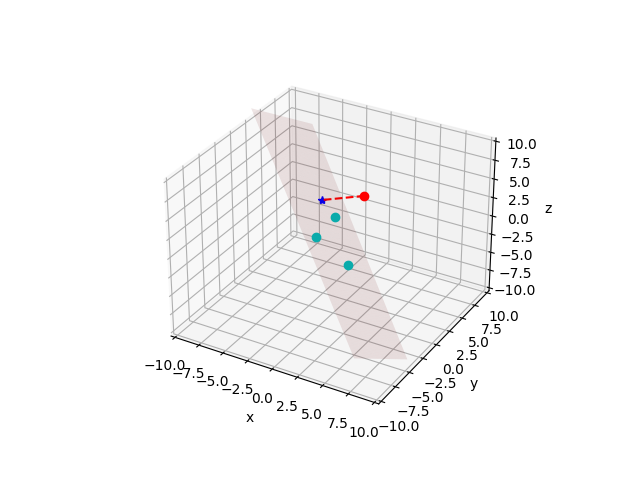

In [28]:
plane.plot_plane(p=p,alpha=0.1,color='r')

#### Coordinates transformation

From cartesian to spherical:

In [29]:
#Test axis
axis=[
    [+1,+0,+0],[-1,+0,+0],
    [+0,+1,+0],[+0,-1,+0],
    [+0,+0,+1],[+0,+0,-1],
]
for i,xyz in enumerate(axis):
    rqf=Science.spherical(xyz)
    cqsqsf=Science.cospherical(xyz)
    rhofct=Science.pcylindrical(xyz)
    print(f"Axis {i+1}:")
    print("\tSpherical:",rqf[0],rqf[1]*Consts.rad,rqf[2]*Consts.rad)
    print("\tCospherical:",cqsqsf)
    print("\tVerify:",mh.cos(rqf[1]),mh.sin(rqf[1]),mh.sin(rqf[2]))
    print("\tPseudo cilyndrical:",rhofct)
    print("\tVerify:",rqf[0]*np.cos(rqf[2]),rqf[1],mh.sin(rqf[2]))

Axis 1:
	Spherical: 1.0 0.0 0.0
	Cospherical: [1. 0. 0.]
	Verify: 1.0 0.0 0.0
	Pseudo cilyndrical: [1.         6.28318531 0.        ]
	Verify: 1.0 0.0 0.0
Axis 2:
	Spherical: 1.0 180.0 0.0
	Cospherical: [-1.  0.  0.]
	Verify: -1.0 1.2246467991473532e-16 0.0
	Pseudo cilyndrical: [1.         3.14159265 0.        ]
	Verify: 1.0 3.141592653589793 0.0
Axis 3:
	Spherical: 1.0 90.0 0.0
	Cospherical: [0. 1. 0.]
	Verify: 6.123233995736766e-17 1.0 0.0
	Pseudo cilyndrical: [1.         1.57079633 0.        ]
	Verify: 1.0 1.5707963267948966 0.0
Axis 4:
	Spherical: 1.0 270.0 0.0
	Cospherical: [ 0. -1.  0.]
	Verify: -1.8369701987210297e-16 -1.0 0.0
	Pseudo cilyndrical: [1.         4.71238898 0.        ]
	Verify: 1.0 4.71238898038469 0.0
Axis 5:
	Spherical: 1.0 0.0 90.0
	Cospherical: [1. 0. 1.]
	Verify: 1.0 0.0 1.0
	Pseudo cilyndrical: [0.         6.28318531 1.        ]
	Verify: 6.123233995736766e-17 0.0 1.0
Axis 6:
	Spherical: 1.0 0.0 -90.0
	Cospherical: [ 1.  0. -1.]
	Verify: 1.0 0.0 -1.0
	Pseudo ci

From spherical to cartesian:

In [30]:
octants=[
    [1,45*Consts.deg,45*Consts.deg],[1,135*Consts.deg,45*Consts.deg],
    [1,225*Consts.deg,45*Consts.deg],[1,315*Consts.deg,45*Consts.deg],
    [1,45*Consts.deg,-45*Consts.deg],[1,135*Consts.deg,-45*Consts.deg],
    [1,225*Consts.deg,-45*Consts.deg],[1,315*Consts.deg,-45*Consts.deg]
]
for i,rqf in enumerate(octants):
    xyz=Science.cartesian(rqf)
    print(f"Octant {i+1}:",xyz) 

Octant 1: [0.5        0.5        0.70710678]
Octant 2: [-0.5         0.5         0.70710678]
Octant 3: [-0.5        -0.5         0.70710678]
Octant 4: [ 0.5        -0.5         0.70710678]
Octant 5: [ 0.5         0.5        -0.70710678]
Octant 6: [-0.5         0.5        -0.70710678]
Octant 7: [-0.5        -0.5        -0.70710678]
Octant 8: [ 0.5        -0.5        -0.70710678]


In order to ease transformation from direction to cartesian we have defined the `direction` routine:

In [31]:
#Unitary vector in the direction long = 30, lat = 60
Science.direction(30,60)

array([0.4330127, 0.25     , 0.8660254])

And the inverse:

In [32]:
Science.direction(1,1,0)

(45.0, 0.0)

#### Method `rotation_matrix`

Compute rotation matrices starting from the direction of the z-axis and a roll in the x-y plane:

In [33]:
#Test rotation
Msys2uni,Muni2sys=Science.rotation_matrix([0,0,1],0)
print(Msys2uni)

Msys2uni,Muni2sys=Science.rotation_matrix([0,0,-1],0)
print(Msys2uni)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[-1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0. -1.]]


#### Method `limb_darkening`

This routine can calculate the value of a limb-darkened surface up until fourth-order:

<IPython.core.display.Javascript object>


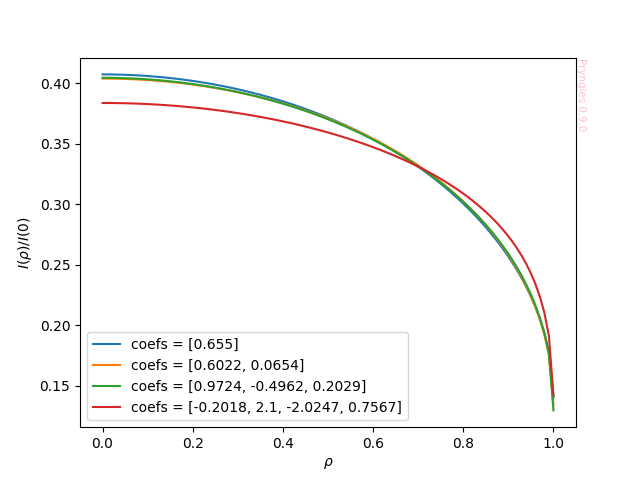

      VERB3::limb_darkening:: Normalization of limb darkening function for cs = [0.655], N = 2.45567825755602
      VERB3::limb_darkening:: Normalization of limb darkening function for cs = [0.6022, 0.0654], N = 2.4767269283350704
      VERB3::limb_darkening:: Normalization of limb darkening function for cs = [0.9724, -0.4962, 0.2029], N = 2.472665297844586
      VERB3::limb_darkening:: Normalization of limb darkening function for cs = [-0.2018, 2.1, -2.0247, 0.7567], N = 2.6067005991229735


In [34]:
Verbose.VERBOSITY=VERB_ALL
fig=plt.figure()
ax=fig.gca()

rhos=np.linspace(0,1,100)
coefs=[0.6550]
ax.plot(rhos,Science.limb_darkening(rhos,coefs),label=f"coefs = {coefs}")
coefs=[0.6022,0.0654]
ax.plot(rhos,Science.limb_darkening(rhos,coefs),label=f"coefs = {coefs}")
coefs=[0.9724,-0.4962,0.2029]
ax.plot(rhos,Science.limb_darkening(rhos,coefs),label=f"coefs = {coefs}")    
coefs=[-0.2018,2.1000,-2.0247,0.7567]
ax.plot(rhos,Science.limb_darkening(rhos,coefs),label=f"coefs = {coefs}")
ax.legend()
ax.set_xlabel(r"$\rho$")
ax.set_ylabel(r"$I(\rho)/I(0)$")
Plot.pryngles_mark(ax);
Verbose.VERBOSITY=VERB_NONE

Normalizations for each coefficient set is stored at:

In [36]:
SCIENCE_LIMB_NORMALIZATIONS

{-8145817878717057878: 2.45567825755602,
 6394508155116276254: 2.4767269283350704,
 5730772039920043893: 2.472665297844586,
 1260437475972070811: 2.6067005991229735}

#### Routine `convex_hull`

Convex hulls are fundamental geometrical entitie to compute the intersection between objects in Pryngles.  These are the basic routines required:

30 30


<IPython.core.display.Javascript object>


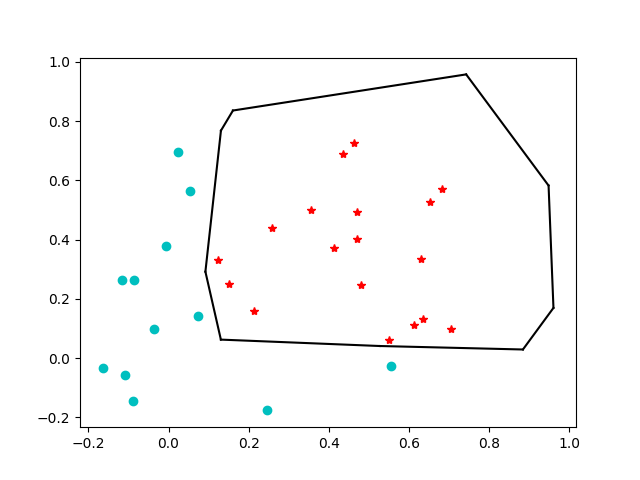

In [37]:
rng = np.random.default_rng()
points = rng.random((30, 2))

#Given a set of points calculate the convex hull containing them
hull = Science.get_convexhull(points)

ps = rng.random((30, 2))-0.2

#Determine which points are inside the convex hull
cond=Science.points_in_hull(ps,hull)

print(len(cond),len(ps))

import matplotlib.pyplot as plt
plt.figure()
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

for p in ps[cond]:
    plt.plot(p[0],p[1],'r*')

for p in ps[~cond]:
    plt.plot(p[0],p[1],'co')

### Plotting routines (`plot`)

The class `Plot` contains useful plotting routines:

In [38]:
Misc.get_methods(Plot)

['_pathpatch_2d_to_3d',
 'animate_rebound',
 'calc_flyby',
 'circle3d',
 'draw_pryngles',
 'pryngles_mark',
 'rgb',
 'rgb_sample']

#### Method `circle3d` and `pryngles_mark`

In order to plot spangles you may use:

<IPython.core.display.Javascript object>


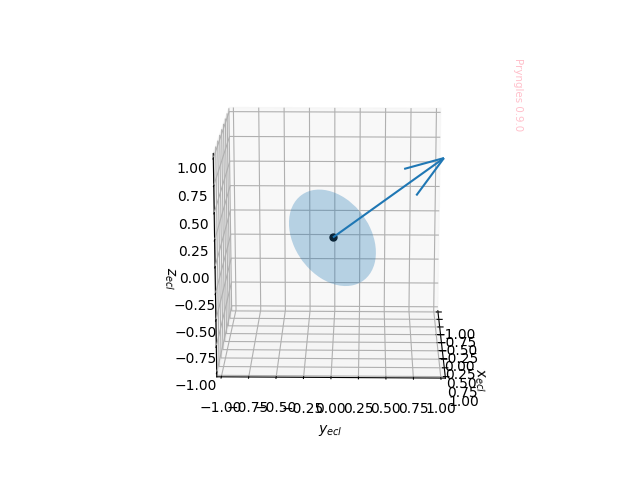

In [39]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.plot([0],[0],[0],'ko',markersize=5)

#This is a routine to plot a spangle
normal=[1,1,1]
Plot.circle3d(ax,(0,0,0),0.5,zDir=normal,fill='None',alpha=0.3)


ax.quiver(0,0,0,normal[0],normal[1],normal[2])
#Decoration
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
ax.set_box_aspect([1,1,1])
ax.set_xlabel("$x_{ecl}$")
ax.set_ylabel("$y_{ecl}$")
ax.set_zlabel("$z_{ecl}$")
ax.view_init(elev=15,azim=1)
Plot.pryngles_mark(ax);

#### Method `draw_pryngles`

The logo of Pryngles can be generated with:

<IPython.core.display.Javascript object>


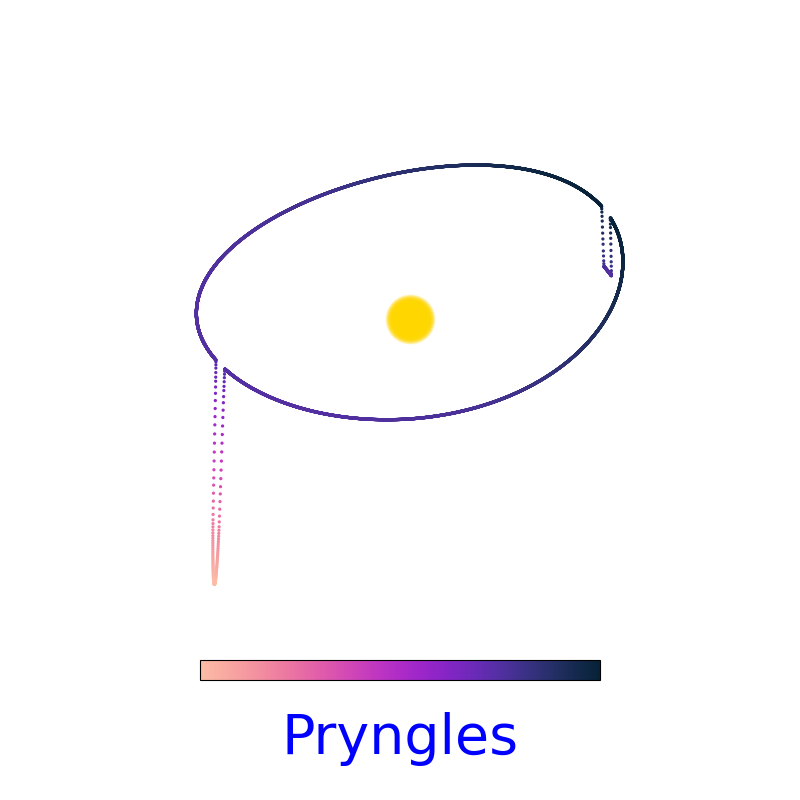

findfont: Font family ['Special Elite'] not found. Falling back to DejaVu Sans.


In [40]:
Plot.draw_pryngles()

#### Method `rgb`

Convert from hls to rgb:

In [41]:
help(Plot.rgb)

Help on function rgb in module pryngles.plot:

rgb(hls, to_hex=False)
    Convert from hue (0-360), level (0-1) and saturation (0-1) to RGB
    
    Parameters:
    
        hls: array(3):
            Array with values of color:
                hls[0]: hue, 0-360, see https://pythonfordesigners.com/tutorials/hsl-color-wheel/
                hls[1]: level, 0: black, 1: white
                hls[2]: saturation, 0: gray, 1: full-color
                
    Return:
    
        rgb: array(3):
            Array with rgb values (R: red, G: green, B: blue)



In [42]:
print(Plot.rgb([27,0.5,0.5]))

(0.75, 0.475, 0.25)


#### Method `rgb_sample`

Generate a color chart of a given hue:

<IPython.core.display.Javascript object>


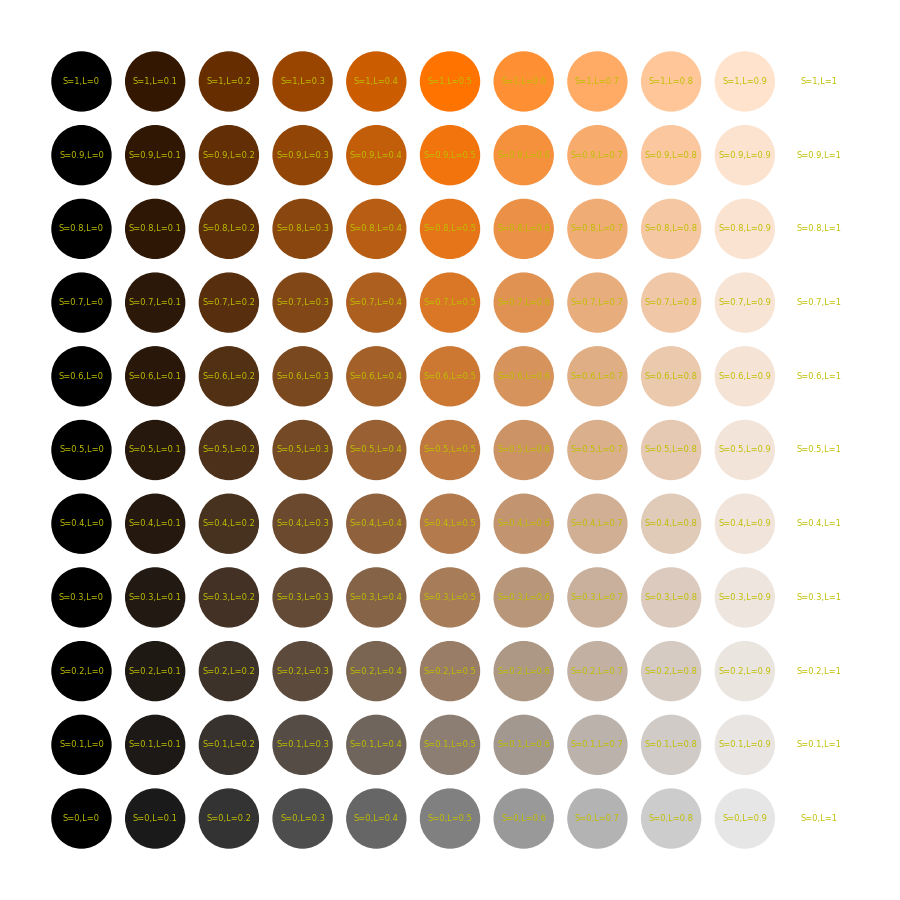

In [43]:
Plot.rgb_sample(27)

#### Routine `calc_flyby`

Fly byes are used to create animations:

<IPython.core.display.Javascript object>


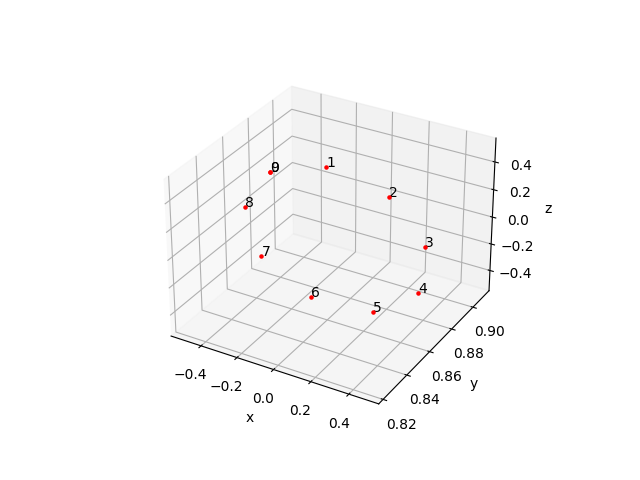

In [44]:
nvecs=Plot.calc_flyby(normal=[1,1,0],lat=60)

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

for i in range(len(nvecs)):
    ax.scatter(nvecs[i,0],nvecs[i,1],nvecs[i,2],c='r',s=5)
    ax.text(nvecs[i,0],nvecs[i,1],nvecs[i,2],i)

ax.set_xlabel("x");
ax.set_ylabel("y");
ax.set_zlabel("z");

#### Routine `animate_rebound`

It is important to know if a rebound simultation has some future:

<IPython.core.display.Javascript object>


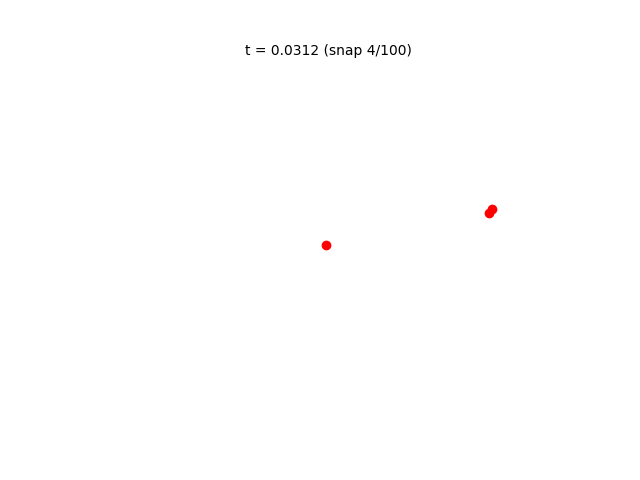

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 761.95it/s]


In [46]:
sim=rb.Simulation()
ms=1
sim.add(m=1)
mp=1e-3
xp=0.3
vp=np.sqrt(sim.G*ms/xp)
sim.add(m=mp,x=xp,vy=vp)
mm=1e-8
xm=0.01
vm=np.sqrt(sim.G*mp/xm)
sim.add(m=mm,x=xp+xm,vy=vp+vm)
P=sim.particles[1].P

anim=Plot.animate_rebound(sim,filename="/tmp/animate-rebound.gif",tend=P,nsnap=100,interval=20)  

--- 
*The authors*, Last update: october, 2022.